# 1: Load the following dataset using the following code

In [99]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y = diabetes.target

#2: Import other necessary libraries next

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#3: Create a function that:
 
A. Takes X and y as in the input

B. Split the X and y into train and test using train_test_split from sklearn

C. Fit a linear regression model to the training X and training y data

D. Get the predicted y data for X test from the model

E. Output (at least) the model fit (i.e., R^2 score = coefficient of determination)

In [101]:
def model_data(X,y):  # take X and y as input

  # split X and y into train and test
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  # fit a linear regression model to the training X and training y data
  model = LinearRegression(fit_intercept=True)
  model.fit(Xtrain,ytrain)

  # get the predicted y data for X test from the model
  y_model = model.predict(Xtest)

  # output (at least) the model fit
  overall_fit = model.score(X,y)
  training_r2 = model.score(Xtrain,ytrain)
  testing_r2 = model.score(Xtest,ytest)

  return overall_fit, training_r2, testing_r2

#4: Show that this function works (i.e., try it with some of the data)

In [102]:
# shows overall fit, training R2, and testing R2 in a tuple
model_data(X[['bmi']],y)

(0.3421645764165051, 0.38880250430560737, 0.17466209865339177)

#5: Then, using the function, find the best single feature (i.e., column) in X that best predicts y

In [103]:
# initialize empty list
r2 = []

# loop over all the columns to find the best one
for i in X.columns:
  overall_fit, training_r2, testing_r2 = model_data(X[[i]],y)  # unpack tuple into the different R2 values
  r2.append(testing_r2)   # append only the testing R2 values
  
  index = r2.index(max(r2))   # index the position of the max testing R2 value to get the best predictor

# print the column that best predicts y using our index
print('The feature in X that best predicts y is:', X.columns[index])   # X['s5'] column best predicts y
print('Overall fit, training R2, and testing R2 for that column is:', model_data(X[['s5']],y))

The feature in X that best predicts y is: s5
Overall fit, training R2, and testing R2 for that column is: (0.3202042604847941, 0.32597994540659747, 0.29630801377437443)


#6: Using object oriented programming, make a figure that has two subplots. On the left, put the training data as a scatterplot (x,y). On the right, the testing data as a scatterplot (x,y). Include the best fitting model line in both plots and include the R^2 value in both plots for the different fits.

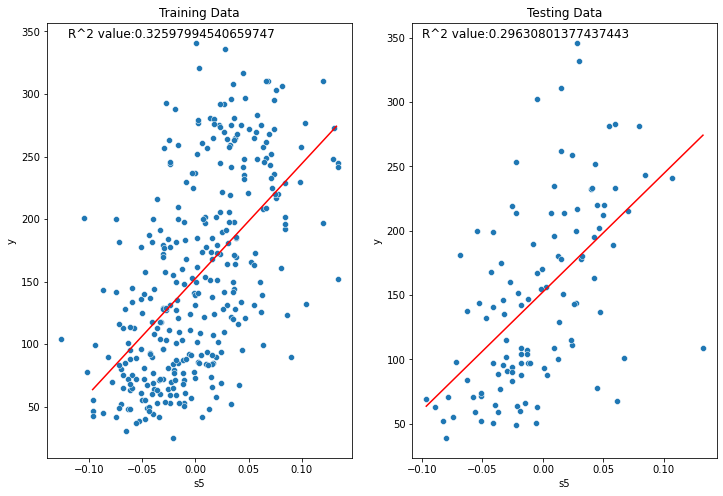

In [104]:
# make training and testing datasets based off the best feature, X['s5']
Xtrain, Xtest, ytrain, ytest = train_test_split(X[['s5']],y,random_state=1)
model = LinearRegression()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

# set up plot
fig,axes = plt.subplots(1,2,figsize=[12,8])

# training data
sns.scatterplot(x = Xtrain[Xtrain.columns[0]],y = ytrain,ax=axes[0])
sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model, color='r',ax=axes[0])
axes[0].text(-.12,345,'R^2 value:' + str(model.score(Xtrain,ytrain)), fontsize=12)
axes[0].set_title('Training Data')
axes[0].set_ylabel('y')

# testing data
sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes[1])
sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model, color='r',ax=axes[1])
axes[1].text(-.1,350,'R^2 value:' + str(model.score(Xtest,ytest)),fontsize=12)
axes[1].set_title('Testing Data')
axes[1].set_ylabel('y')
plt.show()

#7: BONUS (1 point) = Do Steps 5 and 6 inside of a for loop that goes through all of the features. You may have to output/return more information from your function in Step 3 to plot the right feature!

The single best feature is: Index(['s5'], dtype='object')


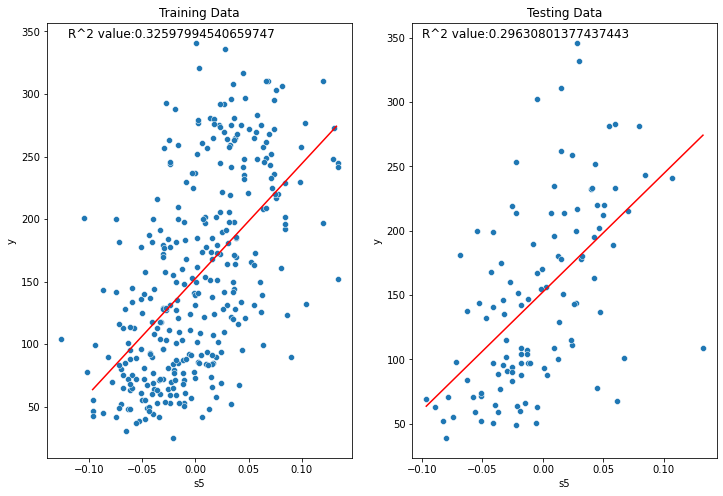

In [109]:
r2 = []

# loop over all the columns
for i in X.columns:

  overall_fit, training_r2, testing_r2 = model_data(X[[i]],y)  # unpack tuple into the different R2 values
  r2.append(testing_r2)   # append only the testing R2 values

  best_feature = X.columns[np.where(r2==max(r2))]   # get the single best feature

  if i == best_feature:
    model_data(X[best_feature],y)   # use the function on the column that best predicts y


print('The single best feature is:',best_feature)

# plot the graph
fig,axes = plt.subplots(1,2,figsize=[12,8])

sns.scatterplot(x = Xtrain[Xtrain.columns[0]],y = ytrain,ax=axes[0])
sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model, color='r',ax=axes[0])
axes[0].text(-.12,345,'R^2 value:' + str(model.score(Xtrain,ytrain)), fontsize=12)
axes[0].set_title('Training Data')
axes[0].set_ylabel('y')

sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes[1])
sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model, color='r',ax=axes[1])
axes[1].text(-.1,350,'R^2 value:' + str(model.score(Xtest,ytest)),fontsize=12)
axes[1].set_title('Testing Data')
axes[1].set_ylabel('y')
plt.show()